In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
# librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# fetch data
col_name = ['area', 'bedrooms', 'price']
data = pd.read_csv('/content/drive/MyDrive/Work/ML/Algorithms/Mutiple Linear Regression/ex1data2.csv', names=col_name)
data 

,area,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [4]:
data.shape

(47, 3)

In [5]:
data.describe()

,area,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
area_value = data.iloc[0:47, 0:1]
area_value.head(5)

,area
0,2104
1,1600
2,2400
3,1416
4,3000


In [ ]:
bedrooms_value = data.iloc[0:47, 1:2]
bedrooms_value.head(5)

,bedrooms
0,3
1,3
2,3
3,2
4,4


In [ ]:
price_value = data.iloc[0:47, 2:3]
price_value.head(5)

,price
0,399900
1,329900
2,369000
3,232000
4,539900


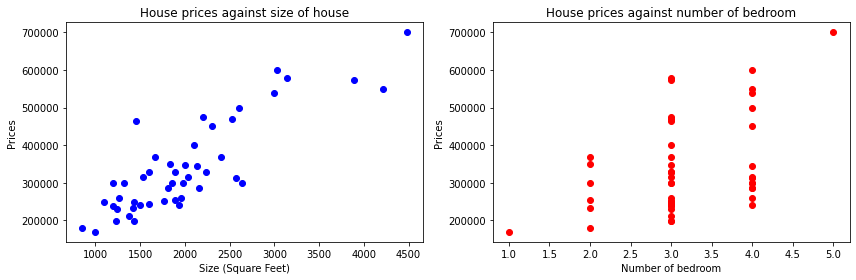

In [ ]:
# draw scatter plot for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)

axes[0].scatter(area_value,price_value,color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")

axes[1].scatter(bedrooms_value,price_value,color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_title("House prices against number of bedroom")

plt.tight_layout()

In [ ]:
# feature normalization
def featureNormalization(x):
  mean = np.mean(x, axis=0)
  std=np.std(x, axis=0)
  X_norm = (x - mean) / std
  
  return X_norm , mean , std

In [ ]:
data.describe()

,area,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
data_norm=data.values # converts from dataframe to array
m2=len(data_norm[:,-1]) # last column size
X2=data_norm[:,0:2].reshape(m2,2) # m2 rows and 2 columns
# X2 has all the features i.e. size and bedrooms
X2, mean_X2, std_X2 = featureNormalization(X2) # normalize X2
X2 = np.append(np.ones((m2,1)),X2,axis=1) # append the 1's array in X2 at first
y2=data_norm[:,-1].reshape(m2,1) # price estimate
theta2=np.zeros((3,1))
X2

In [ ]:
pd.DataFrame(X2).describe()

,0,1,2
count,47.0,4.700000e+01,4.700000e+01
mean,1.0,9.448707e-18,2.710598e-16
std,0.0,1.010811e+00,1.010811e+00
min,1.0,-1.461049e+00,-2.882690e+00
25%,1.0,-7.233261e-01,-2.260934e-01
50%,1.0,-1.433229e-01,-2.260934e-01
75%,1.0,3.412850e-01,1.102205e+00
max,1.0,3.150993e+00,2.430504e+00


In [ ]:
# hypothesis
def hypothesis(theta_array, x1, x2):
  return theta_array[0] + (theta_array[1]*x1) + (theta_array[2]*x2);

In [ ]:
# cost function
def cost_function(theta_array, x1_value, x2_value, y_value, m):
  total_error = 0
  for i in range(m):
    total_error += ((theta_array[0] + theta_array[1]*x1_value[i] + theta_array[2]*x2_value[i]) - y_value[i]) ** 2
  return total_error / 2 * m

In [ ]:
# gradient descent
def gradient_descent(theta_array, x1, x2, Y, alpha, m):
  sum_0 = 0
  sum_1 = 0
  sum_2 = 0

  for i in range(m):
    sum_0 += (theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i]) - Y[i]
    sum_1 += x1[i]*((theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i]) - Y[i])
    sum_2 += x2[i]*((theta_array[0] + theta_array[1]*x1[i] + theta_array[2]*x2[i]) - Y[i])

  new_theta0 = theta_array[0] - alpha * (sum_0) / m
  new_theta1 = theta_array[1] - alpha * (sum_1) / m
  new_theta2 = theta_array[2] - alpha * (sum_2) / m

  updated_theta_array = [new_theta0, new_theta1, new_theta2]
  return updated_theta_array

In [ ]:
# training data
def training(x1_train, x2_train, y_train, alpha, iters):
  m = x1_train.size

  theta_0 = 0
  theta_1 = 0
  theta_2 = 0

  theta_array = [theta_0, theta_1, theta_2]
  cost_function_loss = []

  for i in range(iters):
    theta_array = gradient_descent(theta_array, x1_train, x2_train, y_train, alpha, m)
    cost_function_loss.append(cost_function(theta_array, x1_train, x2_train, y_train, m))

    if i % 10 == 0:
      print('value of theta_0 at iteration %d is: ' % i, theta_array[0])
      print('value of theta_1 at iteration %d is: ' % i, theta_array[1])
      print('value of theta_2 at iteration %d is: ' % i, theta_array[2], '\n')
      ynew = x1_train*theta_array[1] + x2_train*theta_array[2] + theta_array[0]
    
  x = np.arange(0, len(cost_function_loss), step=1)
  plt.plot(x, cost_function_loss, "-b", label="Cost Function Curve")
  plt.title("Learning Curve")
  plt.xlabel("Number Of Iterations")
  plt.ylabel("Cost Function Value")
  plt.legend()
  plt.show()
  print("Cost function values: ",cost_function_loss)
  return theta_array

value of theta_0 at iteration 0 is:  [17020.63297872]
value of theta_1 at iteration 0 is:  [5288.20667464]
value of theta_2 at iteration 0 is:  [2735.44108779] 

value of theta_0 at iteration 10 is:  [146785.90739644]
value of theta_1 at iteration 10 is:  [42975.42465137]
value of theta_2 at iteration 10 is:  [17788.8871769] 

value of theta_0 at iteration 20 is:  [224481.17062072]
value of theta_1 at iteration 20 is:  [63741.65484785]
value of theta_2 at iteration 20 is:  [20435.95150137] 

value of theta_0 at iteration 30 is:  [271000.19471696]
value of theta_1 at iteration 30 is:  [76191.14491348]
value of theta_2 at iteration 30 is:  [18380.38365942] 

value of theta_0 at iteration 40 is:  [298852.85282069]
value of theta_1 at iteration 40 is:  [84304.16067677]
value of theta_2 at iteration 40 is:  [14881.56770877] 

value of theta_0 at iteration 50 is:  [315529.26808337]
value of theta_1 at iteration 50 is:  [89976.20622158]
value of theta_2 at iteration 50 is:  [11257.91539346] 


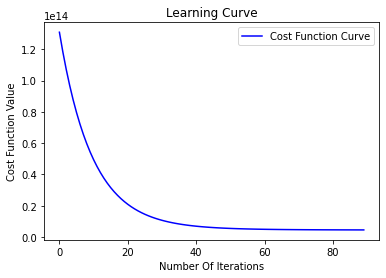

Cost function values:  [array([1.30903637e+14]), array([1.18343329e+14]), array([1.07061193e+14]), array([9.69237983e+13]), array([8.7812079e+13]), array([7.96197274e+13]), array([7.22517773e+13]), array([6.562335e+13]), array([5.96585458e+13]), array([5.42894612e+13]), array([4.94553196e+13]), array([4.51016984e+13]), array([4.1179845e+13]), array([3.7646068e+13]), array([3.44611968e+13]), array([3.15901004e+13]), array([2.90012601e+13]), array([2.6666388e+13]), array([2.45600877e+13]), array([2.26595515e+13]), array([2.09442903e+13]), array([1.93958929e+13]), array([1.79978103e+13]), array([1.67351636e+13]), array([1.55945722e+13]), array([1.45639997e+13]), array([1.36326162e+13]), array([1.27906758e+13]), array([1.20294055e+13]), array([1.13409068e+13]), array([1.07180669e+13]), array([1.01544794e+13]), array([9.64437305e+12]), array([9.18254779e+12]), array([8.76431732e+12]), array([8.38545769e+12]), array([8.042161e+12]), array([7.73099384e+12]), array([7.44885996e+12]), array([7.

In [ ]:
price_value.values
alpha = 0.05
iters = 90

theta_array = training(X2[:,1:2],X2[:,2:3], y2, alpha, iters)
print("the final value of theta_0 is ",theta_array[0])
print("the final value of theta_1 is ",theta_array[1])
print("the final value of theta_2 is ",theta_array[2]) 

In [ ]:
theta_array

[array([337046.53504481]), array([101579.8268961]), array([1220.72747812])]

In [ ]:
predict = hypothesis(theta_array, 5, 2500)
predict

array([3896764.36482409])